In [2]:
import pandas as pd, numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import defaultdict


In [3]:
cat_user_df = pd.read_csv('user_info_001_to_750_v9.csv')

In [4]:
suspicious_user_df = cat_user_df.loc[cat_user_df["user_category"].isin(["suspicious_1", "suspicious_2"])]
non_suspicious_user_df = cat_user_df.loc[~cat_user_df["user_category"].isin(["suspicious_1", "suspicious_2"])]

In [6]:
# Calculate the counts
total_users = cat_user_df['member_name'].nunique()
suspicious_users = cat_user_df[cat_user_df['user_category'] == 'Suspicious']['member_name'].nunique()
non_suspicious_users = total_users - suspicious_users

total_comments = len(cat_user_df)
suspicious_comments = len(cat_user_df[cat_user_df['user_category'] == 'Suspicious'])
non_suspicious_comments = total_comments - suspicious_comments

# Filter the dataset into suspicious and non-suspicious user DataFrames
suspicious_user_df = cat_user_df[cat_user_df['user_category'].isin(['suspicious_1', 'suspicious_2'])]
non_suspicious_user_df = cat_user_df[~cat_user_df['user_category'].isin(['suspicious_1', 'suspicious_2'])]

# Calculate counts for plotting
suspicious_users = suspicious_user_df['member_name'].nunique()
non_suspicious_users = non_suspicious_user_df['member_name'].nunique()

suspicious_comments = len(suspicious_user_df)
non_suspicious_comments = len(non_suspicious_user_df)

print("Suspicious Users:", suspicious_users)
print("Non-Suspicious Users:", non_suspicious_users)
print("Suspicious Comments:", suspicious_comments)
print("Non-Suspicious Comments:", non_suspicious_comments)


Suspicious Users: 161
Non-Suspicious Users: 866
Suspicious Comments: 9451
Non-Suspicious Comments: 38064


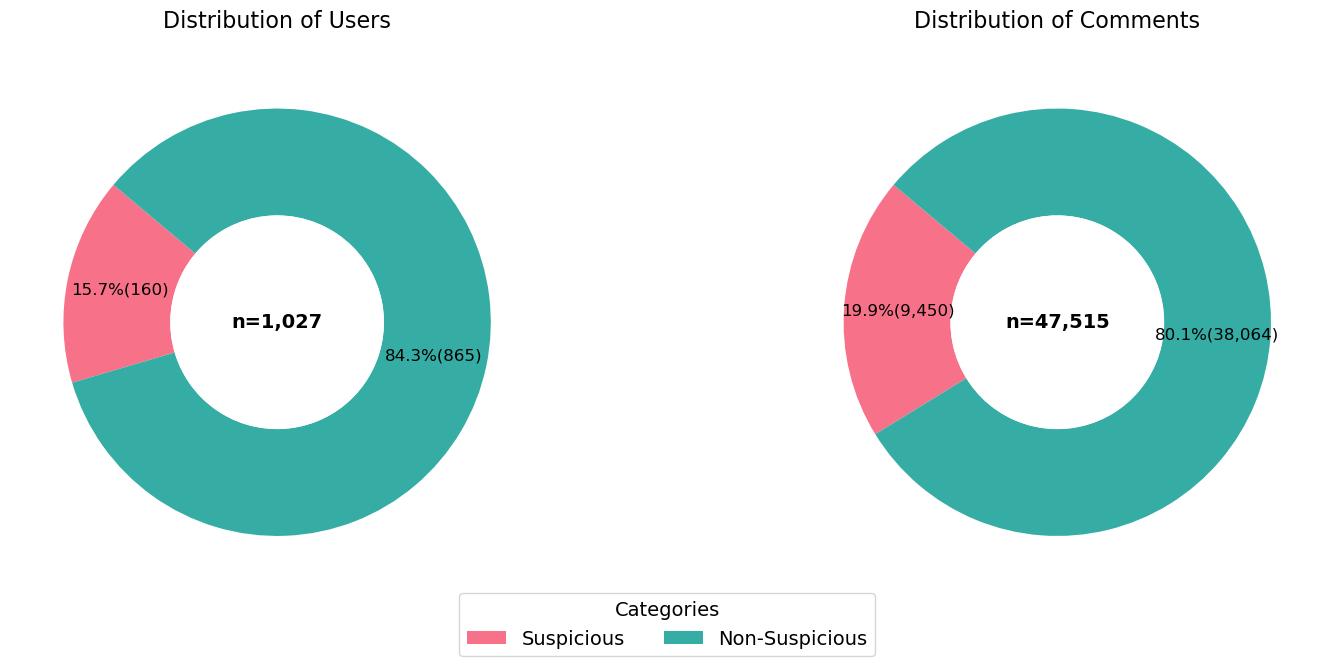

In [ ]:
def plot_donut_charts_with_multiline_labels(suspicious_users, non_suspicious_users, suspicious_comments, non_suspicious_comments):
    labels = ['Suspicious', 'Non-Suspicious']
    user_counts = [suspicious_users, non_suspicious_users]
    comment_counts = [suspicious_comments, non_suspicious_comments]
    colors = sns.color_palette("husl", 2)

    fig, axs = plt.subplots(1, 2, figsize=(16, 7))

    def autopct_format(pct, allvals):
        absolute = int(pct/100.*sum(allvals))
        return f'{pct:.1f}%\
({absolute:,})'  # Added newline between percentage and count

    # Plot the donut chart for users
    wedges, texts, autotexts = axs[0].pie(
        user_counts,
        labels=None,
        autopct=lambda pct: autopct_format(pct, user_counts),
        pctdistance=0.75,
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12, 'linespacing': 1.5},  # Increased line spacing
        wedgeprops=dict(width=0.5)
    )
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    axs[0].add_artist(centre_circle)
    axs[0].set_title('Distribution of Users', fontsize=16, pad=20)
    axs[0].text(0, 0, f'n=\
{sum(user_counts):,}', ha='center', va='center', fontsize=14, fontweight='bold')

    # Plot the donut chart for comments
    wedges, texts, autotexts = axs[1].pie(
        comment_counts,
        labels=None,
        autopct=lambda pct: autopct_format(pct, comment_counts),
        pctdistance=0.75,
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12, 'linespacing': 1.5},  # Increased line spacing
        wedgeprops=dict(width=0.5)
    )
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    axs[1].add_artist(centre_circle)
    axs[1].set_title('Distribution of Comments', fontsize=16, pad=20)
    axs[1].text(0, 0, f'n=\
{sum(comment_counts):,}', ha='center', va='center', fontsize=14, fontweight='bold')

    # Add legend with adjusted positioning
    legend = fig.legend(
        wedges,
        labels,
        title="Categories",
        loc="center",
        bbox_to_anchor=(0.5, 0.1),
        ncol=2,
        fontsize=14,
        title_fontsize=14
    )

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()

# Use the actual calculated values
plot_donut_charts_with_multiline_labels(
    suspicious_users=suspicious_users,
    non_suspicious_users=non_suspicious_users,
    suspicious_comments=suspicious_comments,
    non_suspicious_comments=non_suspicious_comments
)



/var/folders/w0/hns05fls5vdbgj18ty4hk9w00000gp/T/ipykernel_7603/696364602.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("member_level")["average_rating"].describe(percentiles=[0.25, 0.5, 0.75])
/var/folders/w0/hns05fls5vdbgj18ty4hk9w00000gp/T/ipykernel_7603/696364602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["average_rating"] = df["average_rating"].astype(float)
/var/folders/w0/hns05fls5vdbgj18ty4hk9w00000gp/T/ipykernel_7603/696364602.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 


Statistics for All Users:
Member Level 1: Median = 4.0, Q1 = 2.3, Q3 = 4.8
Member Level 2: Median = 4.0, Q1 = 3.4, Q3 = 4.6
Member Level 3: Median = 4.0, Q1 = 3.6, Q3 = 4.6
Member Level 4: Median = 4.6, Q1 = 4.0, Q3 = 5.0
Member Level 5: Median = nan, Q1 = nan, Q3 = nan
Member Level 6: Median = 4.0, Q1 = 3.2, Q3 = 4.4
Member Level 7: Median = nan, Q1 = nan, Q3 = nan
Member Level 8: Median = 4.0, Q1 = 3.6, Q3 = 4.0

Statistics for Suspicious Users:
Member Level 1: Median = 5.0, Q1 = 5.0, Q3 = 5.0
Member Level 2: Median = nan, Q1 = nan, Q3 = nan
Member Level 3: Median = 5.0, Q1 = 4.95, Q3 = 5.0
Member Level 4: Median = 4.8, Q1 = 4.6, Q3 = 5.0
Member Level 5: Median = nan, Q1 = nan, Q3 = nan
Member Level 6: Median = nan, Q1 = nan, Q3 = nan
Member Level 7: Median = nan, Q1 = nan, Q3 = nan
Member Level 8: Median = nan, Q1 = nan, Q3 = nan

Statistics for Non-Suspicious Users:
Member Level 1: Median = 4.0, Q1 = 2.25, Q3 = 4.8
Member Level 2: Median = 4.0, Q1 = 3.4, Q3 = 4.6
Member Level 3: M

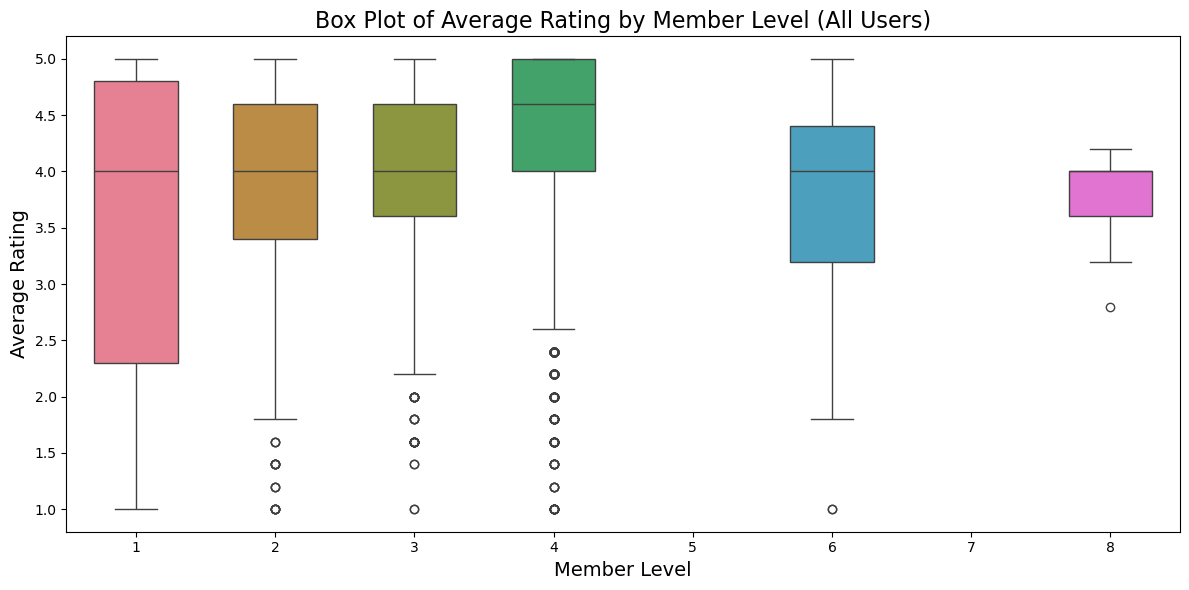

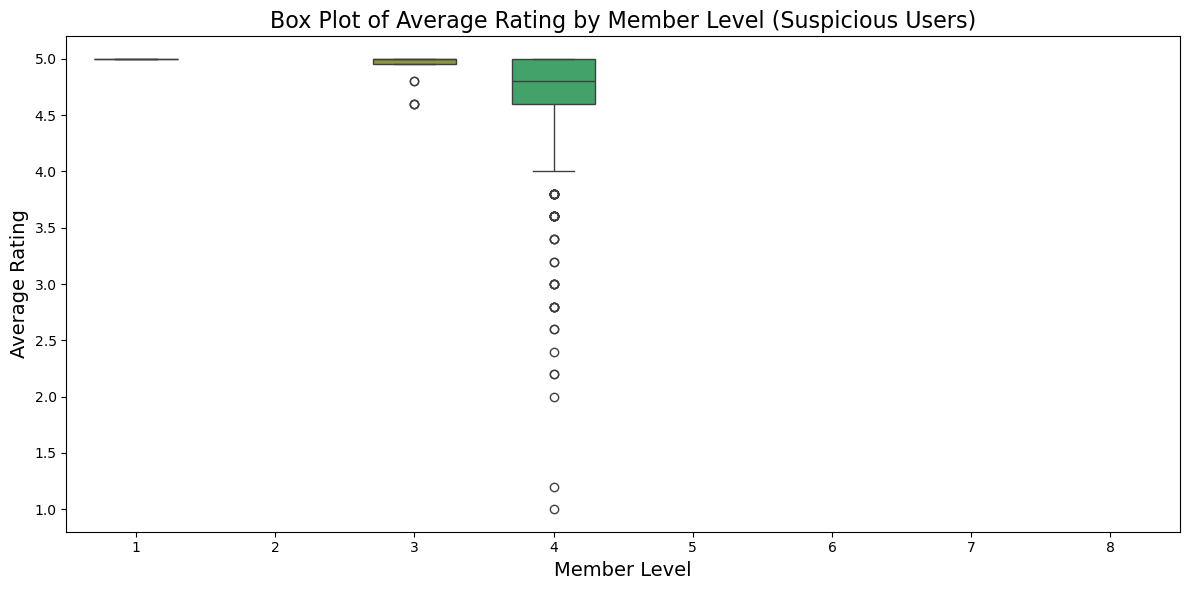

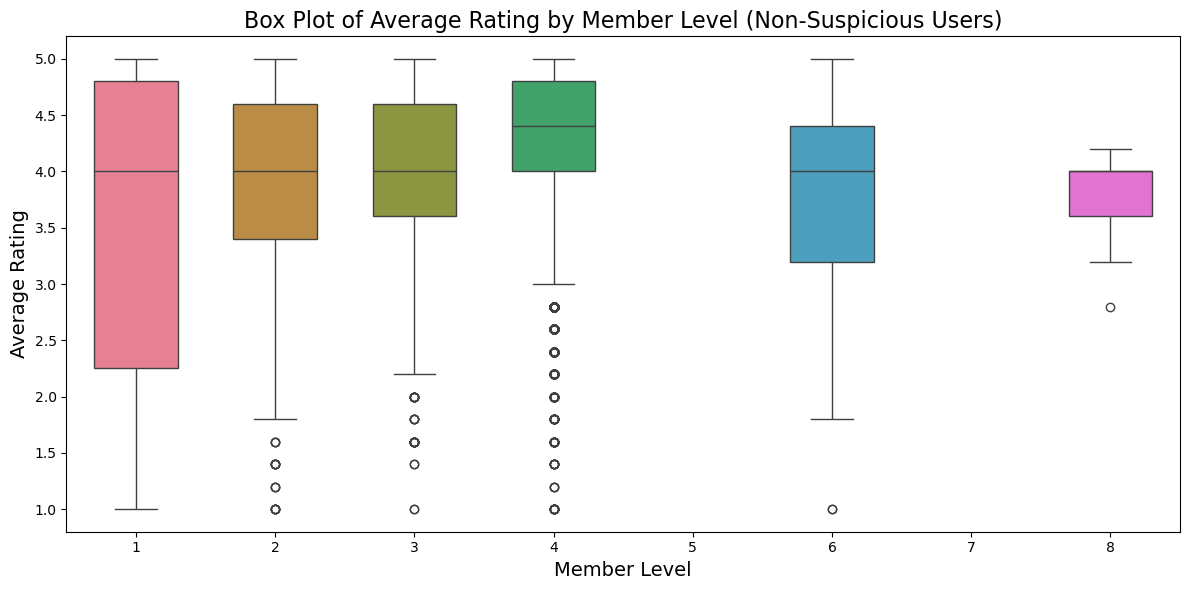

In [ ]:
def box_plot_average_rating_by_col(df: pd.DataFrame, box_plot_title: str, df_name: str):
    """Create a box plot of average rating by member level and print median, Q1, and Q3 scores"""
    # Ensure 'average_rating' is cleaned and converted to float
    df["average_rating"] = df["average_rating"].astype(float)

    # Define the ordered levels including 'Unknown'
    ordered_levels = ['1', '2', '3', '4', '5', '6', '7', '8']  # Define the ordinal order

    # Normalize 'member_level' column (convert to string, handle NaN)
    df["member_level"] = df["member_level"].dropna().astype(str).str.strip()

    # Convert 'member_level' to an ordinal categorical type
    df["member_level"] = pd.Categorical(df["member_level"], categories=ordered_levels, ordered=True)

    # Set the figure size
    plt.figure(figsize=(12, 6))  # Adjust the figure size to make the plot wider

    # Create the box plot
    sns.boxplot(
        data=df,
        x="member_level",
        y="average_rating",
        hue="member_level",  # Assign `x` to `hue`
        palette="husl",
        width=0.6,  # Make the boxes wider
        dodge=False,  # Prevent splitting boxes due to `hue`
        legend=False  # Disable redundant legend
    )

    # Add labels and title
    plt.title(box_plot_title, fontsize=16)
    plt.xlabel("Member Level", fontsize=14)
    plt.ylabel("Average Rating", fontsize=14)

    # Rotate x-axis labels if needed
    plt.xticks(rotation=0)

    # Show the plot
    plt.tight_layout()

    # Calculate and print median, Q1, and Q3 for each member level
    stats = df.groupby("member_level")["average_rating"].describe(percentiles=[0.25, 0.5, 0.75])
    print(f"\nStatistics for {df_name}:")
    for level in ordered_levels:
        if level in stats.index:
            median = stats.loc[level, "50%"]
            q1 = stats.loc[level, "25%"]
            q3 = stats.loc[level, "75%"]
            print(f"Member Level {level}: Median = {median}, Q1 = {q1}, Q3 = {q3}")

# Example usage
box_plot_average_rating_by_col(cat_user_df, "Box Plot of Average Rating by Member Level (All Users)", "All Users")
box_plot_average_rating_by_col(suspicious_user_df, "Box Plot of Average Rating by Member Level (Suspicious Users)", "Suspicious Users")
box_plot_average_rating_by_col(non_suspicious_user_df, "Box Plot of Average Rating by Member Level (Non-Suspicious Users)", "Non-Suspicious Users")

In [8]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np

def plot_dual_member_level_distribution_plotly(df1, df2):
    # Create subplots
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    
    def process_data(df):
        member_level_counts = df.groupby("member_level")["member_name"].nunique()
        # Ensure we're sorting numerically
        member_level_counts = member_level_counts.sort_index(key=lambda x: pd.to_numeric(x))
        return member_level_counts.index, member_level_counts.values

    # Process data for both charts
    labels1, values1 = process_data(df1)
    labels2, values2 = process_data(df2)
    
    # Generate HUSL colors using seaborn for all possible levels (1-8)
    all_levels = sorted(set(list(labels1) + list(labels2)))
    n_colors = len(all_levels)
    colors = sns.color_palette("husl", n_colors).as_hex()
    
    # Create a color mapping dictionary to ensure consistency
    color_map = dict(zip(all_levels, colors))
    
    # Get colors in the order of labels for each chart
    colors1 = [color_map[label] for label in labels1]
    colors2 = [color_map[label] for label in labels2]

    # Add traces for first donut
    fig.add_trace(go.Pie(
        labels=labels1,
        values=values1,
        name="All Users",
        hole=0.6,
        textinfo='percent+value',
        hovertemplate="Level: %{label}<br>Count: %{value}<br>Percentage: %{percent}<extra></extra>",
        marker=dict(colors=colors1),
        domain={'column': 0},
        sort=False
    ), 1, 1)

    # Add traces for second donut
    fig.add_trace(go.Pie(
        labels=labels2,
        values=values2,
        name="Suspicious Users",
        hole=0.6,
        textinfo='percent+value',
        hovertemplate="Level: %{label}<br>Count: %{value}<br>Percentage: %{percent}<extra></extra>",
        marker=dict(colors=colors2),
        domain={'column': 1},
        sort=False
    ), 1, 2)

    # Update layout
    fig.update_layout(
        title={
            'text': "Distribution by Member Level",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=24)
        },
        annotations=[
            dict(text='All Users', x=0.18, y=0.5, font_size=16, showarrow=False),
            dict(text='Suspicious Users', x=0.82, y=0.5, font_size=16, showarrow=False),
            dict(text=f'n = {df1["member_name"].nunique()}', x=0.18, y=0.45, font_size=14, showarrow=False),
            dict(text=f'n = {df2["member_name"].nunique()}', x=0.82, y=0.45, font_size=14, showarrow=False)
        ],
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.1,
            xanchor="center",
            x=0.5,
            traceorder='normal'
        ),
        width=1200,
        height=700,
        paper_bgcolor='white',
        plot_bgcolor='white'
    )

    # Save the plot as HTML
    fig.write_html("member_distribution_consistent_colors.html")
    
    return fig

# Read and prepare the data
df = pd.read_csv('user_info_001_to_750_v9.csv')
suspicious_user_df = df[df['user_category'].isin(['suspicious_1', 'suspicious_2'])]

# Create and display the plot
fig = plot_dual_member_level_distribution_plotly(df, suspicious_user_df)
fig.show()


In [ ]:
# Define the pattern you want to match using regular expressions
pattern = r'^(我今日|而家|上星期|同朋友|朋友|呢晚|呢日|最近|呢排|呢間|自從|位於|呢排|呢班)'  # Add ^ to ensure it matches only at the start
compiled_pattern = re.compile(pattern)  # Compile the pattern for efficiency

# Function to calculate frequency, percentage, and total comments
def calculate_pattern_frequency_and_percentage(df, pattern):
    # Use defaultdict to initialize counts to 0
    pattern_freq = defaultdict(int)
    total_comments = defaultdict(int)
    
    # Iterate through DataFrame rows
    for member_name, comments in zip(df['member_name'], df['comment_text']):
        # Ensure comments are strings; handle missing values gracefully
        if pd.notna(comments):  
            count = len(pattern.findall(str(comments)))
            pattern_freq[member_name] += count
            total_comments[member_name] += 1  # Increment the total comments for that member

    # Calculate pattern percentages
    results = []
    for member_name in pattern_freq.keys():
        frequency = pattern_freq[member_name]
        total = total_comments[member_name]
        percentage = (frequency / total) * 100 if total > 0 else 0
        results.append((member_name, frequency, total, percentage))

    # Convert results to a DataFrame
    result_df = pd.DataFrame(results, columns=["member_name", "pattern_frequency", "total_comments", "pattern_percentage"])
    return result_df

def get_top_word_count_df(df: pd.DataFrame, user_count: int):
        
    # Call the function and store the results in a DataFrame
    word_count_df = calculate_pattern_frequency_and_percentage(df, compiled_pattern)

    # Sort the DataFrame by "pattern_percentage" in descending order
    word_count_df = word_count_df.sort_values(by="pattern_percentage", ascending=False)

    # Filter out members with at least 50 comments
    filtered_word_count_df = word_count_df[word_count_df["total_comments"] >= user_count]

    # Select the top 20 rows based on "pattern_percentage"
    word_count_df = filtered_word_count_df.head(20)

    # Return the resulting DataFrame
    return word_count_df

get_top_word_count_df(cat_user_df, 50)
get_top_word_count_df(suspicious_user_df, 50)
get_top_word_count_df(non_suspicious_user_df, 50)

,member_name,pattern_frequency,total_comments,pattern_percentage
408,Charlotte Yiu,78,80,97.500000
454,zoe_fooddiary,73,90,81.111111
0,小綿羊廚房,39,50,78.000000
21,ballball615,32,50,64.000000
415,foodandrabbit,62,100,62.000000
50,ChubbyBowtie,30,50,60.000000
11,starrychow,26,50,52.000000
504,Carrie1119,26,50,52.000000
38,bobochow_,23,50,46.000000
374,Winkieeeeee,35,80,43.750000


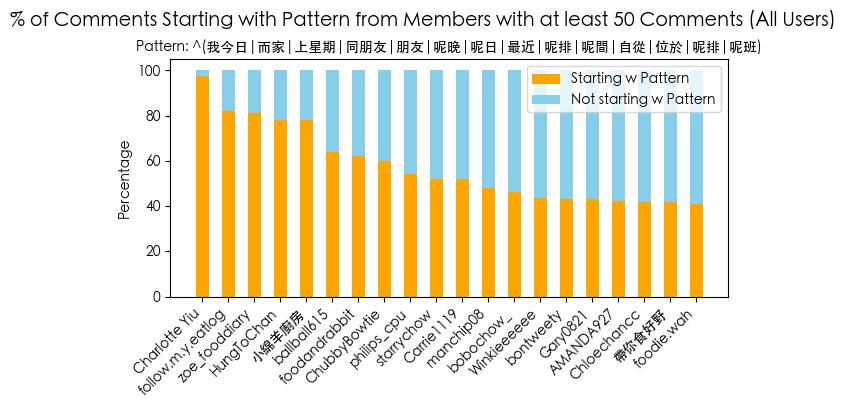

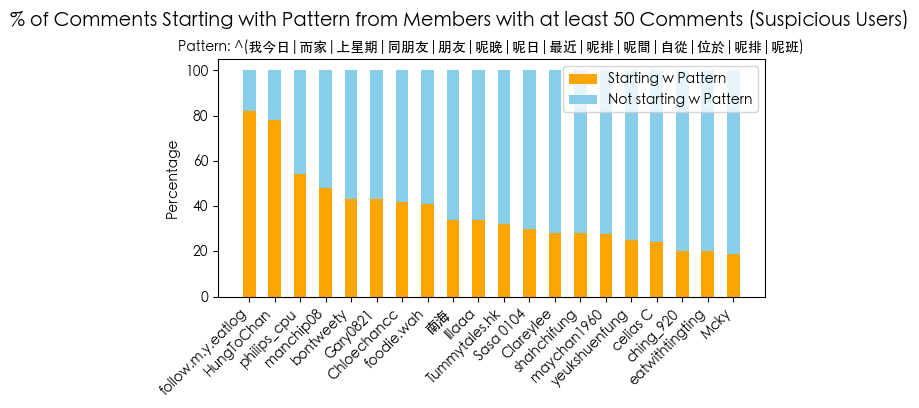

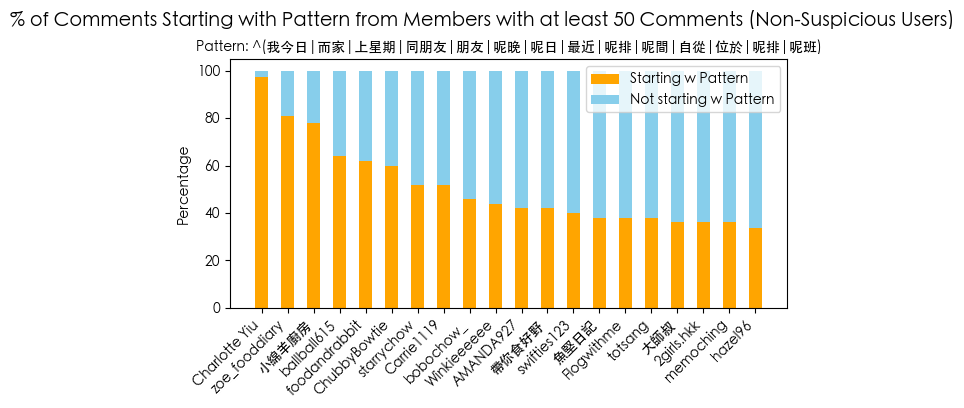

In [ ]:
# Use a macOS font like STHeiti or Hiragino Sans GB
rcParams['font.sans-serif'] = ['STHeiti']  # Try STHeiti first
# If STHeiti doesn't work, try Hiragino Sans GB:
# rcParams['font.sans-serif'] = ['Hiragino Sans GB']

rcParams['axes.unicode_minus'] = False  # Fix negative signs not showing correctly

# Plot a stacked bar chart with the top_20_word_count_df
def plot_stacked_bar(df, bar_plot_title: str):
    # Extract necessary data
    member_names = df["member_name"]
    lower_bars = df["pattern_percentage"]
    upper_bars = 100 - lower_bars  # Complement of percentage
    
    # Create the plot
    x = np.arange(len(member_names))  # X-axis positions
    bar_width = 0.5  # Bar width
    
    # Plot lower bar (percentage)
    plt.bar(x, lower_bars, color='orange', label='Starting w Pattern', width=bar_width)
    
    # Plot upper bar (1 - percentage)
    plt.bar(x, upper_bars, bottom=lower_bars, color='skyblue', label='Not starting w Pattern', width=bar_width)

    # Add labels, title, and legend
    plt.xticks(x, member_names, rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.ylabel('Percentage')
    
    # Set the main title using suptitle
    plt.suptitle(bar_plot_title, fontsize=14, y=0.84)
    
    # Set the subtitle using title
    plt.title('Pattern: ^(我今日|而家|上星期|同朋友|朋友|呢晚|呢日|最近|呢排|呢間|自從|位於|呢排|呢班)', fontsize=10, pad=5)  # Reduced padding to bring it closer to the suptitle

    plt.legend(loc='upper right')
    plt.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit titles and avoid overlap

    # Show the plot
    plt.show()

# Assuming top_20_word_count_df is already created and filtered
plot_stacked_bar(get_top_word_count_df(cat_user_df, 50), '% of Comments Starting with Pattern from Members with at least 50 Comments (All Users)')
plot_stacked_bar(get_top_word_count_df(suspicious_user_df, 50), '% of Comments Starting with Pattern from Members with at least 50 Comments (Suspicious Users)')
plot_stacked_bar(get_top_word_count_df(non_suspicious_user_df, 50), '% of Comments Starting with Pattern from Members with at least 50 Comments (Non-Suspicious Users)')


Count of comments starting with each pattern:
   Pattern  Count
0       呢間   1178
1       最近   1021
2       位於    891
3       朋友    732
4      同朋友    376
5       呢日    282
6       自從    138
7      上星期    105
8       呢排     98
9       呢晚     41
10     我今日     40
11      而家     37
12      呢班      3
13   Total   4942

Total no. of users in our data set: 1027
No. of members using these patterns as opening: 703
No. of comments starting with these patterns: 4942


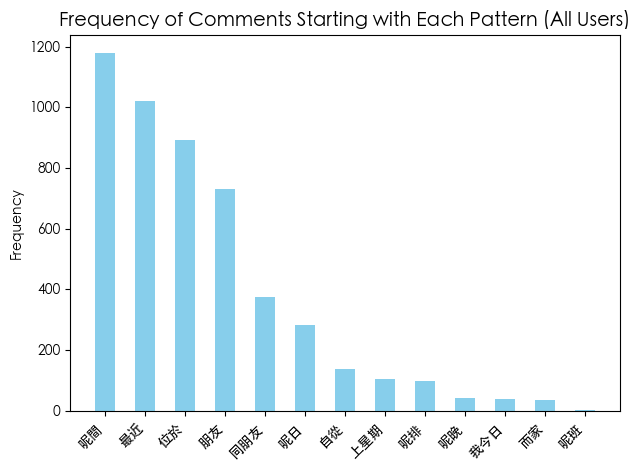


Count of comments starting with each pattern:
   Pattern  Count
0       位於    249
1       最近    230
2       朋友    191
3       呢間    169
4       呢日    133
5      同朋友     95
6       自從     25
7      上星期     22
8       呢排     20
9       而家      4
10      呢晚      2
11      呢班      2
12     我今日      1
13   Total   1143

Total no. of users in our data set: 161
No. of members using these patterns as opening: 123
No. of comments starting with these patterns: 1143


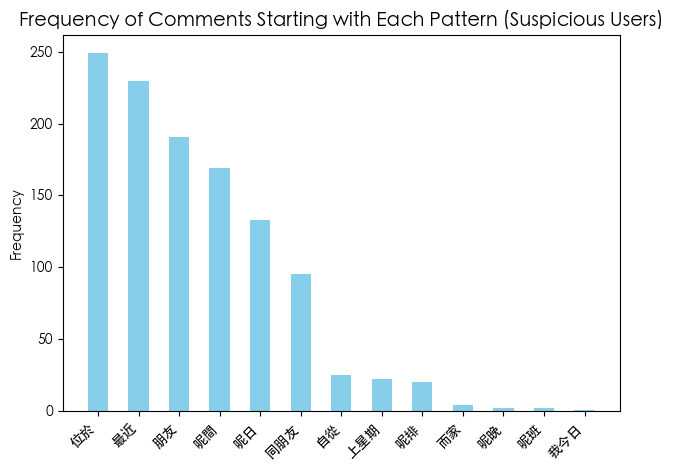


Count of comments starting with each pattern:
   Pattern  Count
0       呢間   1009
1       最近    791
2       位於    642
3       朋友    541
4      同朋友    281
5       呢日    149
6       自從    113
7      上星期     83
8       呢排     78
9       呢晚     39
10     我今日     39
11      而家     33
12      呢班      1
13   Total   3799

Total no. of users in our data set: 866
No. of members using these patterns as opening: 580
No. of comments starting with these patterns: 3799


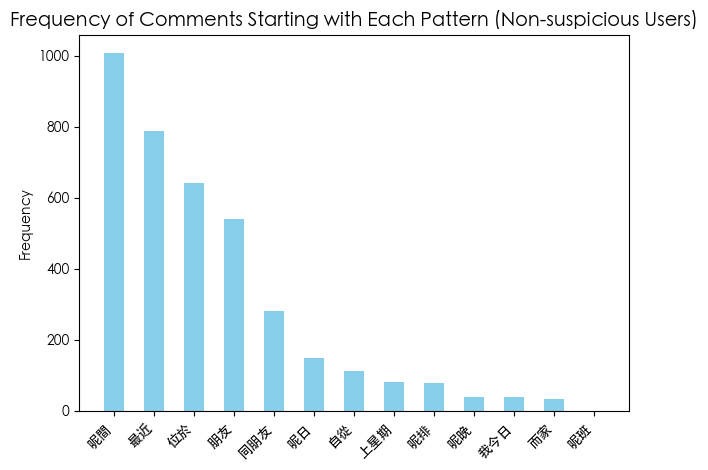

In [ ]:
def get_pattern_df(df: pd.DataFrame):
    # Define the pattern to match the start of the string
    pattern = r'^(我今日|而家|上星期|同朋友|朋友|呢晚|呢日|最近|呢排|呢間|自從|位於|呢排|呢班)'  # Add ^ to ensure it matches only at the start

    # Filter rows where "comment_text" begins with the pattern
    filtered_data = df[df["comment_text"].str.match(pattern, na=False)]  # na=False prevents matching on NaN values

    # Count the total number of users and pattern-specific statistics
    total_users = len(df["member_name"].unique())
    users_with_pattern = len(filtered_data["member_name"].unique())
    comments_with_pattern = filtered_data["comment_text"].count()

    # Count the occurrences of each pattern
    pattern_counts = filtered_data["comment_text"] \
        .str.extract(r'^(我今日|而家|上星期|同朋友|朋友|呢晚|呢日|最近|呢排|呢間|自從|位於|呢排|呢班)')[0].value_counts()

    # Combine counts into a DataFrame
    pattern_df = pd.DataFrame({
        "Pattern": pattern_counts.index,
        "Count": pattern_counts.values
    }).reset_index(drop=True)

    # Add a summary row for the total count
    summary_data = {
        "Pattern": ["Total"],
        "Count": [comments_with_pattern]
    }
    summary_df = pd.DataFrame(summary_data)

    # Append the summary row to the pattern DataFrame
    pattern_df = pd.concat([pattern_df, summary_df], ignore_index=True)

    # Print the results
    print("\nCount of comments starting with each pattern:")
    print(pattern_df)
    print(f"\nTotal no. of users in our data set: {total_users}")
    print(f"No. of members using these patterns as opening: {users_with_pattern}")
    print(f"No. of comments starting with these patterns: {comments_with_pattern}")

    return pattern_df

# Plot a frequency bar chart
def plot_frequency_bar(pattern_df, bar_plot_title: str):
    # Exclude the Total row for visualization
    pattern_df = pattern_df[pattern_df["Pattern"] != "Total"]
    
    # Extract necessary data
    patterns = pattern_df["Pattern"]
    counts = pattern_df["Count"]

    # Create the plot
    x = np.arange(len(patterns))  # X-axis positions
    bar_width = 0.5  # Bar width
    
    # Plot the bars (frequency)
    plt.bar(x, counts, color='skyblue', label='Frequency', width=bar_width)

    # Add labels, title, and legend
    plt.xticks(x, patterns, rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.ylabel('Frequency')
    plt.title(bar_plot_title, fontsize=14)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot the graph
plot_frequency_bar(get_pattern_df(cat_user_df), 'Frequency of Comments Starting with Each Pattern (All Users)')
plot_frequency_bar(get_pattern_df(suspicious_user_df), 'Frequency of Comments Starting with Each Pattern (Suspicious Users)')
plot_frequency_bar(get_pattern_df(non_suspicious_user_df), 'Frequency of Comments Starting with Each Pattern (Non-suspicious Users)')

In [ ]:
# Define the individual patterns to count
patterns = ["我今日", "而家", "上星期", "同朋友", "朋友", "呢晚", "呢日", "最近", "呢排", "呢間", "自從", "位於", "呢排", "呢班"]

# Initialize a dictionary to store counts for each pattern
pattern_counts = {}
user_counts = {}

# Loop through each pattern and count the comments and unique users
for pattern in patterns:
    # Filter rows where the comment starts with the pattern
    filtered_data = cat_user_df[cat_user_df["comment_text"].str.startswith(pattern, na=False)]
    
    # Count the number of comments for this pattern
    pattern_counts[pattern] = len(filtered_data)
    
    # Count the number of unique users for this pattern
    user_counts[pattern] = filtered_data["member_name"].nunique()

# Print the respective counts for each pattern
print("Count of comments beginning with each pattern and unique users:")
for pattern in patterns:
    print(f"{pattern}: {pattern_counts[pattern]} comments from {user_counts[pattern]} unique users")

# Total number of comments
print(f"Total no. of comments: {len(cat_user_df)}")

# Calculate percentage of suspicious comments starting with a specific pattern (e.g., "朋友")
suspicious_pattern = "朋友"
if suspicious_pattern in pattern_counts:
    suspicious_percentage = (pattern_counts[suspicious_pattern] / len(cat_user_df)) * 100
    print(f"Percentage of suspicious comments starting with '{suspicious_pattern}': {suspicious_percentage:.2f}%")

print(f"Total no. of users in the df cat_user_df: {cat_user_df["member_name"].unique().size}")
print(f"Total no. of comments in df cat_user_df: {cat_user_df["member_name"].size}")

Count of comments beginning with each pattern and unique users:
我今日: 40 comments from 9 unique users
而家: 37 comments from 30 unique users
上星期: 105 comments from 49 unique users
同朋友: 376 comments from 156 unique users
朋友: 732 comments from 308 unique users
呢晚: 41 comments from 9 unique users
呢日: 282 comments from 37 unique users
最近: 1021 comments from 318 unique users
呢排: 98 comments from 63 unique users
呢間: 1178 comments from 295 unique users
自從: 138 comments from 90 unique users
位於: 891 comments from 208 unique users
呢排: 98 comments from 63 unique users
呢班: 3 comments from 2 unique users
Total no. of comments: 47515
Percentage of suspicious comments starting with '朋友': 1.54%
Total no. of users in the df cat_user_df: 1027
Total no. of comments in df cat_user_df: 47515
